In [1]:
from scmidas.model import MIDAS
import lightning as L
from scmidas.config import load_config

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

from scmidas.config import load_config
from scmidas.model import MIDAS
from scmidas.utils import load_predicted
import lightning as L

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import torch

sc.set_figure_params(figsize=(4, 4))

In [17]:
adata = sc.read_h5ad('../data/result section 2/midas/multi_2_3.h5ad')

In [62]:
rna = pd.read_csv('../data/result section 2/midas/rnaHD-4.csv',index_col=0)

In [64]:
# maskrna = pd.Series(index=adata.var_names[adata.var['feature_types']=='Gene Expression'],data=1)
# maskadt = pd.Series(index=adata.var_names[adata.var['feature_types']=='Antibody Capture'],data=1)

maskrna = pd.Series(index=rna.columns,data=1)

In [65]:
maskrna.to_csv('../data/result section 2/midas/rna_mask.csv')
# maskadt.to_csv('../data/result section 2/midas/adt_mask.csv')

In [3]:
path = '../data/result section 2/midas/all123_hvg500/'

In [4]:
data_config = [
    {'rna': path+'rnaHV.csv', 'adt': path+'adtHV.csv'},
    {'rna': path+'rnaHD-4.csv', 'adt': path+'adtHD-4.csv'},
    {'rna': path+'rnaP8.csv', 'adt': path+'adtP8.csv'},
]

dims_x = {
    'rna':[500],
    'adt': [72]
}

mask_config = [
    {'rna':path+'rna_mask.csv','adt':path+'adt_mask.csv'},
    {'rna':path+'rna_mask.csv','adt':path+'adt_mask.csv'},
    {'rna':path+'rna_mask.csv','adt':path+'adt_mask.csv'},
]


tree_label = pd.read_csv(path+'tree_label.csv',index_col=0)
tree_label = torch.tensor(tree_label.values, dtype=torch.float32)

In [13]:
import toml

dims_x = {
    'rna': [33538],
    'adt': [72]
}

# 将字典写入 TOML 文件
with open('../data/result section 2/midas/testdata/feat/dims_x.toml', 'w') as f:
    toml.dump(dims_x, f)

FileNotFoundError: [Errno 2] No such file or directory: '../data/result section 2/midas/testdata/feat/dims_x.toml'

In [18]:
data_config

[{'rna': '../data/result section 2/midas/all123_hvg10000/rnaHV.csv',
  'adt': '../data/result section 2/midas/all123_hvg10000/adtHV.csv'},
 {'rna': '../data/result section 2/midas/all123_hvg10000/rnaHD-4.csv',
  'adt': '../data/result section 2/midas/all123_hvg10000/adtHD-4.csv'},
 {'rna': '../data/result section 2/midas/all123_hvg10000/rnaP8.csv',
  'adt': '../data/result section 2/midas/all123_hvg10000/adtP8.csv'}]

In [5]:
# Configure MIDAS with the data
configs = load_config()
datasets, dims_s, s_joint, combs = MIDAS.configure_data_from_csv(data_config,mask_config,tree_label=tree_label)
model = MIDAS.configure_data(configs, datasets, dims_x, dims_s, s_joint, combs)

INFO:root:The model is initialized with the default configurations.
INFO:root:Input data: 
         #CELL  #RNA  #ADT  #VALID_RNA  #VALID_ADT
BATCH 0  10467   500    72       33538          72
BATCH 1  14009   500    72       33538          72
BATCH 2   8485   500    72       33538          72


In [29]:
trainer = L.Trainer(max_epochs=500)
trainer.fit(model=model)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type          | Params | Mode 
-----------------------------------------------
0 | net  | VAE           | 1.5 M  | train
1 | dsc  | Discriminator | 39.2 K | train
-----------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.5 M     Total params
5.998     Total estimated model params size (MB)
154       Modules in train mode
0         Modules in eval mode
INFO:root:Total number of samples: 32961 from 3 datasets.
INFO:root:Using MultiBatchSampler for data loading.
/home/xinzhu/anaconda3/envs/vae-tools/lib/python3.12/site-packages/torch/utils/data/sampler.py:68: UserWarning: `data_source` argument is not used and will be removed in 2.2.0.You may still have custom imp

Epoch 0:   6%|▌         | 7/120 [02:11<35:17,  0.05it/s, v_num=90, loss_/recon_loss_step=3.88e+4, loss_/kld_loss_step=17.00, loss_/metric_loss_step=212.0, loss_/consistency_loss_step=532.0, loss/net_step=3.92e+4, loss/dsc_step=99.20]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [30]:
model.predict(path,
        joint_latent=True,
        mod_latent=True,
        impute=True,
        batch_correct=True,
        translate=True,
        input=True)

INFO:root:Predicting ...
INFO:root:Processing batch 0: ['rna', 'adt']
 78%|███████▊  | 32/41 [03:16<00:55,  6.13s/it]


KeyboardInterrupt: 

In [36]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

from scmidas.config import load_config
from scmidas.model import MIDAS
from scmidas.utils import load_predicted
import lightning as L

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

sc.set_figure_params(figsize=(4, 4))

In [17]:
path = '../data/result section 2/midas/all123_hvg500'

In [6]:
import pandas as pd
import numpy as np
label = []
batch_id = []
for i in ['HV','HD-4','P8']:
    label.append(pd.read_csv(path+'/label_%s.csv'%i,header=None,index_col=0 ).values.flatten())
    batch_id.append([i] * len(label[-1]))
labels = np.concatenate(label)
batch_ids = np.concatenate(batch_id)

array(['CD8.NAIVE', 'cMono', 'CD4.TCM', ..., 'CD4.TEM', 'CD4.TEM',
       'B.INT'], shape=(32961,), dtype=object)

INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 41/41 [00:00<00:00, 401.73it/s]
INFO:root:Loading batch 0: x_bc, rna
100%|██████████| 41/41 [00:00<00:00, 219.87it/s]
INFO:root:Loading batch 0: x_bc, adt
100%|██████████| 41/41 [00:00<00:00, 640.81it/s]
INFO:root:Loading batch 1: z, joint
100%|██████████| 55/55 [00:00<00:00, 427.54it/s]
INFO:root:Loading batch 1: x_bc, rna
100%|██████████| 55/55 [00:00<00:00, 214.93it/s]
INFO:root:Loading batch 1: x_bc, adt
100%|██████████| 55/55 [00:00<00:00, 542.12it/s]
INFO:root:Loading batch 2: z, joint
100%|██████████| 34/34 [00:00<00:00, 371.16it/s]
INFO:root:Loading batch 2: x_bc, rna
100%|██████████| 34/34 [00:00<00:00, 214.90it/s]
INFO:root:Loading batch 2: x_bc, adt
100%|██████████| 34/34 [00:00<00:00, 460.13it/s]
INFO:root:Converting to numpy ...
INFO:root:Converting batch 0: s, joint
INFO:root:Converting batch 0: z, joint
INFO:root:Converting batch 0: x_bc, rna
INFO:root:Converting batch 0: x_bc,

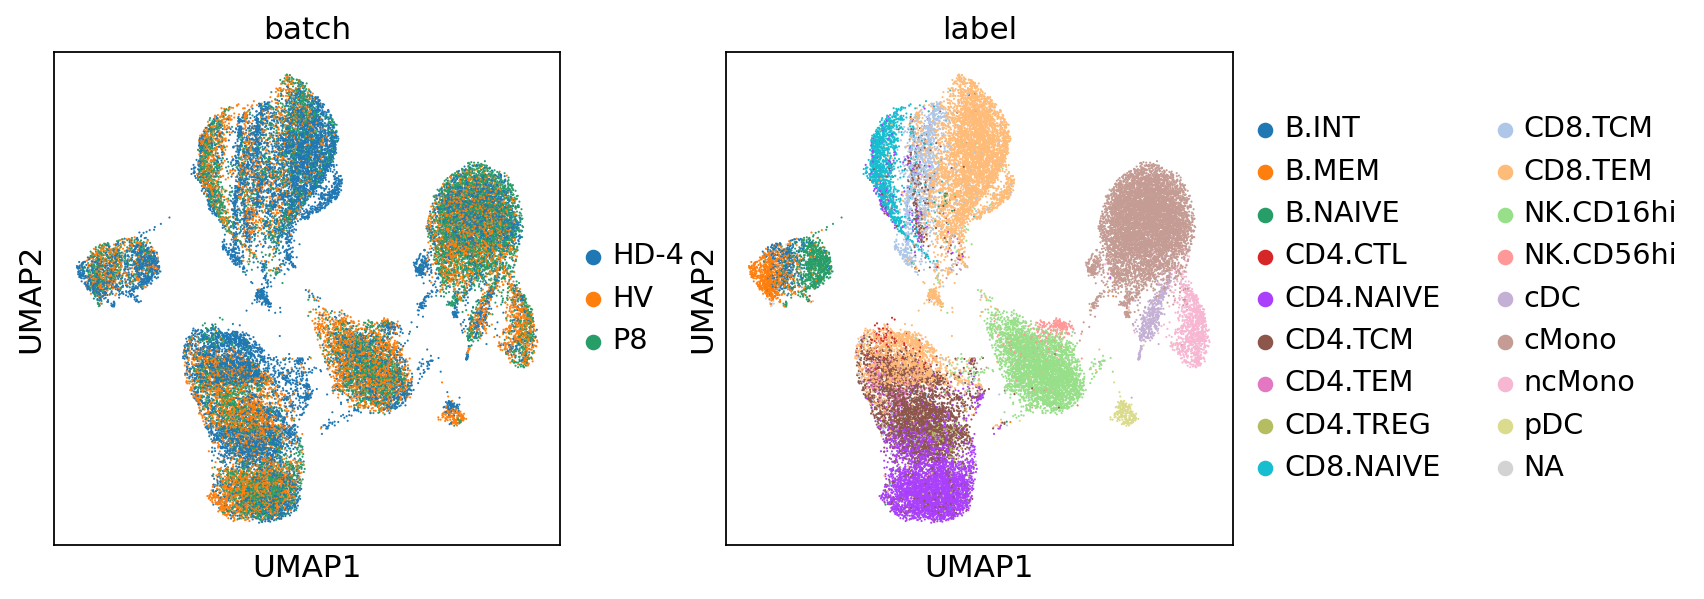

In [107]:
joint_embeddings = load_predicted(path, model.combs, joint_latent=True, batch_correct=True)

adata_bio = sc.AnnData(joint_embeddings['z']['joint'][:, :model.dim_c])
# adata_tech = sc.AnnData(joint_embeddings['z']['joint'][:, model.dim_c:])

adata_bio.obs['batch'] = batch_ids
adata_bio.obs['label'] = labels
# adata_tech.obs['batch'] = batch_ids
# adata_tech.obs['label'] = labels

for adata in [adata_bio]:
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    # shuffle
    sc.pp.subsample(adata, fraction=1)
    sc.pl.umap(adata, color=['batch', 'label'], ncols=2)

... storing 'label2' as categorical


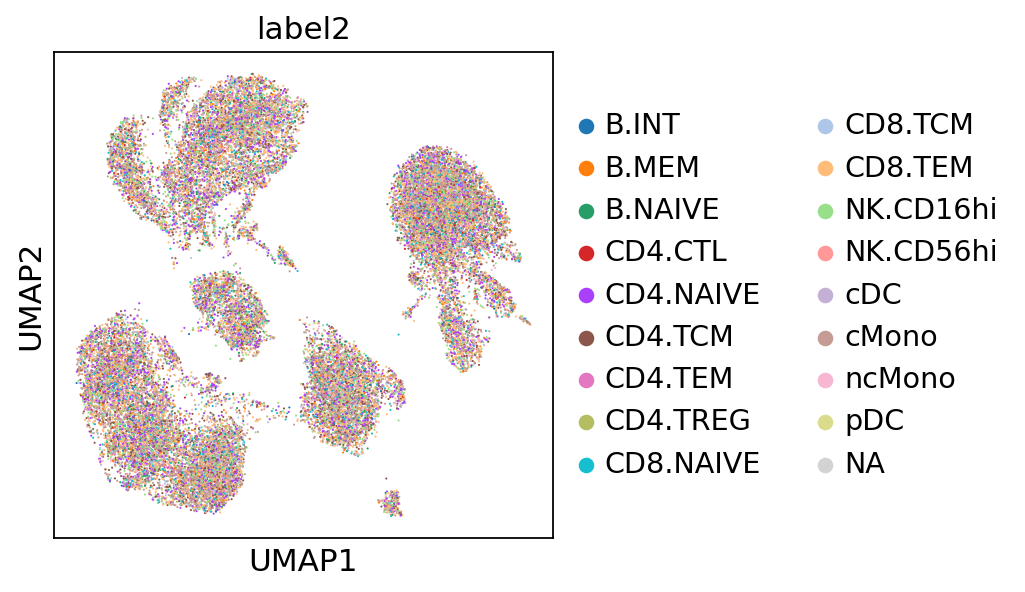

In [90]:
adata.obs['label2'] = labels
sc.pl.umap(adata, color='label2')

In [128]:
# adata_bio.uns['tree_label_colors'] = 'red'
# tree_label
# adata_bio[[str(x) for x in range(100)]].obs['label']
# adata_bio =  adata_bio[[str(x) for x in range(len(adata_bio))],:]

adata_bio.obs_names #= tree_label.index

Index(['AAACCCAAGCGGTAAC-1-40_s3', 'AAACCCAAGGCAATGC-1-41_s3',
       'AAACCCAAGGGCAACT-1-37_s3', 'AAACCCAAGTCTAGAA-1-42_s3',
       'AAACCCACACCCGTAG-1-41_s3', 'AAACCCAGTCATAGTC-1-42_s3',
       'AAACCCAGTGGAAGTC-1-38_s3', 'AAACCCAGTTCGAAGG-1-37_s3',
       'AAACCCAGTTGGGTTT-1-43_s3', 'AAACCCATCAGCGCAC-1-42_s3',
       ...
       'E2L8_TTTCATGTCCGGCAAC_s6', 'E2L8_TTTCCTCCACCAATTG_s6',
       'E2L8_TTTCCTCGTATGTCCA_s6', 'E2L8_TTTCGATAGATAGTCA_s6',
       'E2L8_TTTGACTGTAGTTACC_s6', 'E2L8_TTTGACTGTCAATGGG_s6',
       'E2L8_TTTGACTGTCCCGCAA_s6', 'E2L8_TTTGATCAGATGTAGT_s6',
       'E2L8_TTTGGTTTCGTCAACA_s6', 'E2L8_TTTGTTGGTTAGTTCG_s6'],
      dtype='object', length=32961)

In [123]:
adata_bio[[str(x) for x in range(100)]].obs['tree_label']

0      1
1      1
2      1
3     -1
4      1
      ..
95     1
96    -1
97     1
98     1
99     1
Name: tree_label, Length: 100, dtype: object

In [133]:
rnapp = sc.read_h5ad('../data/result section 2/rna_pp_time0_bc.h5ad')

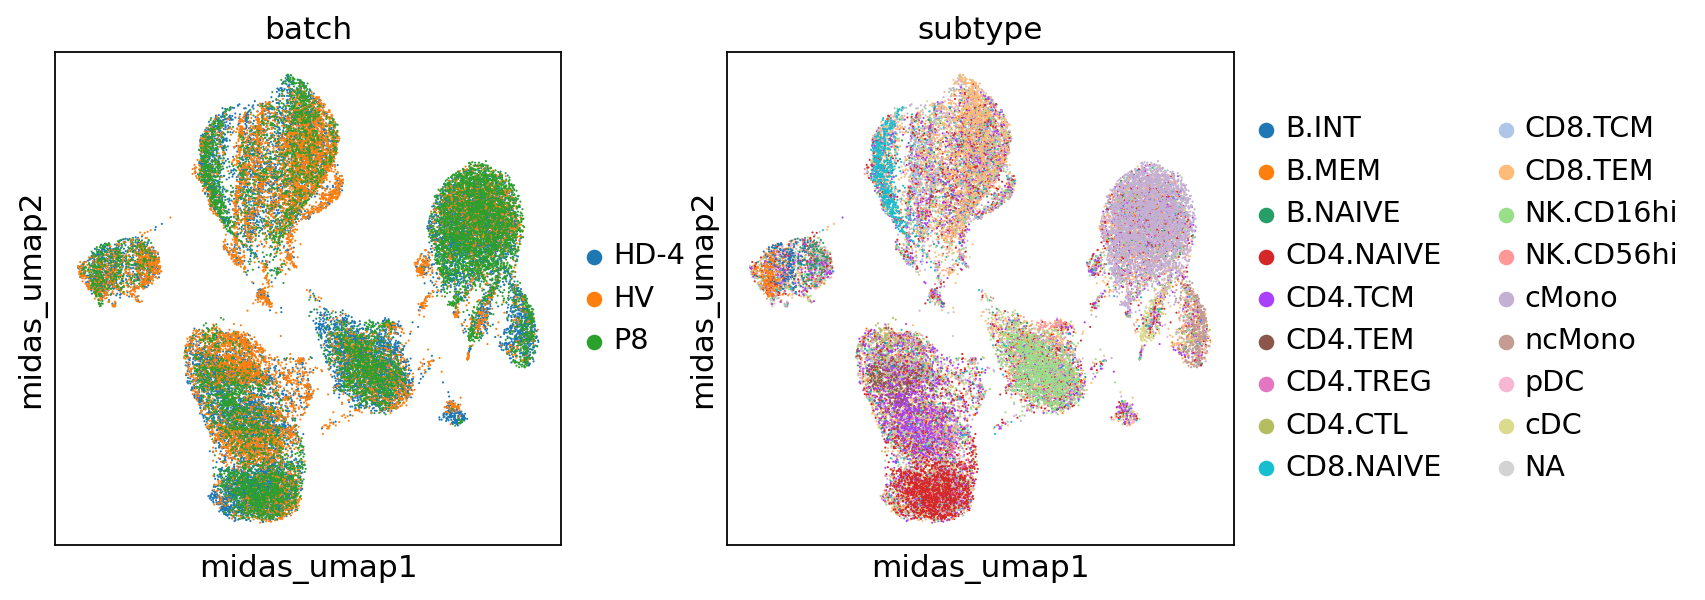

In [135]:
rnapp.obsm['midas_umap'] = adata_bio.obsm['X_umap']
sc.pl.embedding(rnapp, basis='midas_umap', color=['batch','subtype'])

/home/xinzhu/anaconda3/envs/vae-tools/lib/python3.12/site-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'tree_label' as categorical


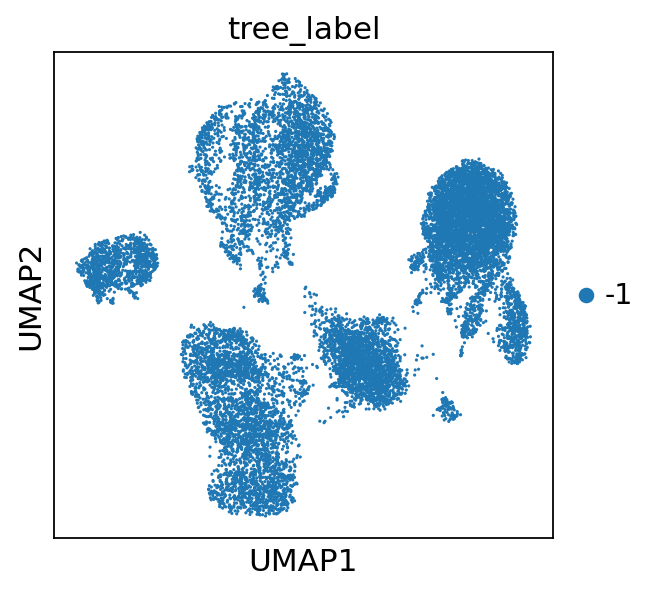

In [115]:
adata.obs['tree_label'] = pd.Series(index=[str(x) for x in range(len(adata_bio))], data=np.array(tree_label.iloc[:,0].values).astype(str)) 
sc.pl.umap(adata[adata.obs['tree_label']=='-1'], color=['tree_label'])

# adata.obs['tree_label'] = pd.Series(index=[str(x) for x in range(len(adata_bio))], data=np.array(tree_labels[:,0]).astype(str)) 
# adata.uns['tree_label_colors'] = 'red'
# sc.pl.umap(adata, color='tree_label')

In [99]:
tree = pd.DataFrame(index=[str(x) for x in range(len(adata))], data=np.array(tree_labels)) 
tree.index.intersection(adata.obs_names)

/tmp/ipykernel_4648/340849696.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  tree = pd.DataFrame(index=[str(x) for x in range(len(adata))], data=np.array(tree_labels))


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '32951', '32952', '32953', '32954', '32955', '32956', '32957', '32958',
       '32959', '32960'],
      dtype='object', length=32961)

In [102]:
adata.obsm['tree_labels'] = tree.loc[adata.obs_names] 

In [104]:
adata.obsm['tree_labels']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
5040,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
25746,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
15725,1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13560,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0
20363,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0
32103,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
30403,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
21243,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [106]:

"""
z: 潜在变量 (n_cells, latent_dim)
tree_labels: 多维标签 (n_cells, n_tree_nodes)
margin: 间隔参数
"""
z = adata_bio.X
z =  torch.tensor(z, dtype=torch.float32)
# tree_labels = pd.read_csv(path+'/tree_label.csv',index_col=0)
# tree_cols = torch.tensor(tree_labels.columns.astype(int), dtype=torch.int32)
tree_labels = torch.tensor(adata.obsm['tree_labels'].values, dtype=torch.int32)
# tree_labels = torch.tensor(tree_labels.values, dtype=torch.float32)
margin = 2


loss = 0.0
n_nodes = tree_labels.shape[1]
node_neg_dists = {}

for i in range(n_nodes):
    # 提取当前节点的有效标签（非零）
    # print(tree_labels.shape)
    split, subsplit  = {}, {}
    k = tree_cols[i]
    split[-1], split[1] = z[tree_labels[:, i]==-1], z[tree_labels[:, i]==1]
    if len(split[-1]) < 2 or len(split[1]) < 2:
        continue
    for u in [1,2]:
        # print(tree_cols)
        sub_k = torch.where(tree_cols == 2*k+u)[0] 

        if len(sub_k) < 1:
            continue
        sub_k = sub_k[0]
        # print(sub_k)
        subsplit[-1], subsplit[1] = z[tree_labels[:, sub_k]==-1], z[tree_labels[:, sub_k]==1]
        if len(subsplit[-1]) < 2 or len(subsplit[1]) < 2 :
            continue
        subdist = torch.cdist(subsplit[-1], subsplit[1], p=2).mean()
        majordist = torch.cdist(subsplit[int(2*u-3)], split[-int(2*u-3)], p=2).mean()
        # u=2: d(subsplit[1], split[-1]); u=1:d(subsplit[-1], split[1])
        # subdist < majordist
        loss += torch.relu(subdist - majordist + margin)
        # if subdist - majordist + margin > 0:
        print(k,2*k+u,subdist, majordist)




tensor(0, dtype=torch.int32) tensor(1, dtype=torch.int32) tensor(2.2112) tensor(2.2663)
tensor(0, dtype=torch.int32) tensor(2, dtype=torch.int32) tensor(2.1188) tensor(2.3543)
tensor(1, dtype=torch.int32) tensor(3, dtype=torch.int32) tensor(2.3000) tensor(2.3215)
tensor(1, dtype=torch.int32) tensor(4, dtype=torch.int32) tensor(1.9916) tensor(2.2031)
tensor(2, dtype=torch.int32) tensor(5, dtype=torch.int32) tensor(1.8811) tensor(2.0936)
tensor(2, dtype=torch.int32) tensor(6, dtype=torch.int32) tensor(2.2094) tensor(2.1183)
tensor(3, dtype=torch.int32) tensor(7, dtype=torch.int32) tensor(2.3044) tensor(2.3307)
tensor(3, dtype=torch.int32) tensor(8, dtype=torch.int32) tensor(1.9964) tensor(2.3171)
tensor(5, dtype=torch.int32) tensor(12, dtype=torch.int32) tensor(1.8235) tensor(1.8271)
tensor(6, dtype=torch.int32) tensor(14, dtype=torch.int32) tensor(2.1313) tensor(2.2213)
tensor(7, dtype=torch.int32) tensor(15, dtype=torch.int32) tensor(2.3193) tensor(2.3119)
tensor(8, dtype=torch.int32) 

In [50]:
tree_label

tensor([[ 1.,  0., -1.,  ...,  0.,  0.,  0.],
        [ 1.,  0., -1.,  ...,  0.,  0.,  0.],
        [ 1.,  0., -1.,  ...,  0.,  0.,  0.],
        ...,
        [ 1.,  0., -1.,  ..., -1.,  0.,  0.],
        [ 1.,  0., -1.,  ..., -1.,  0.,  0.],
        [-1.,  1.,  0.,  ...,  0.,  0.,  0.]])

In [36]:
loss

tensor(29.9443)

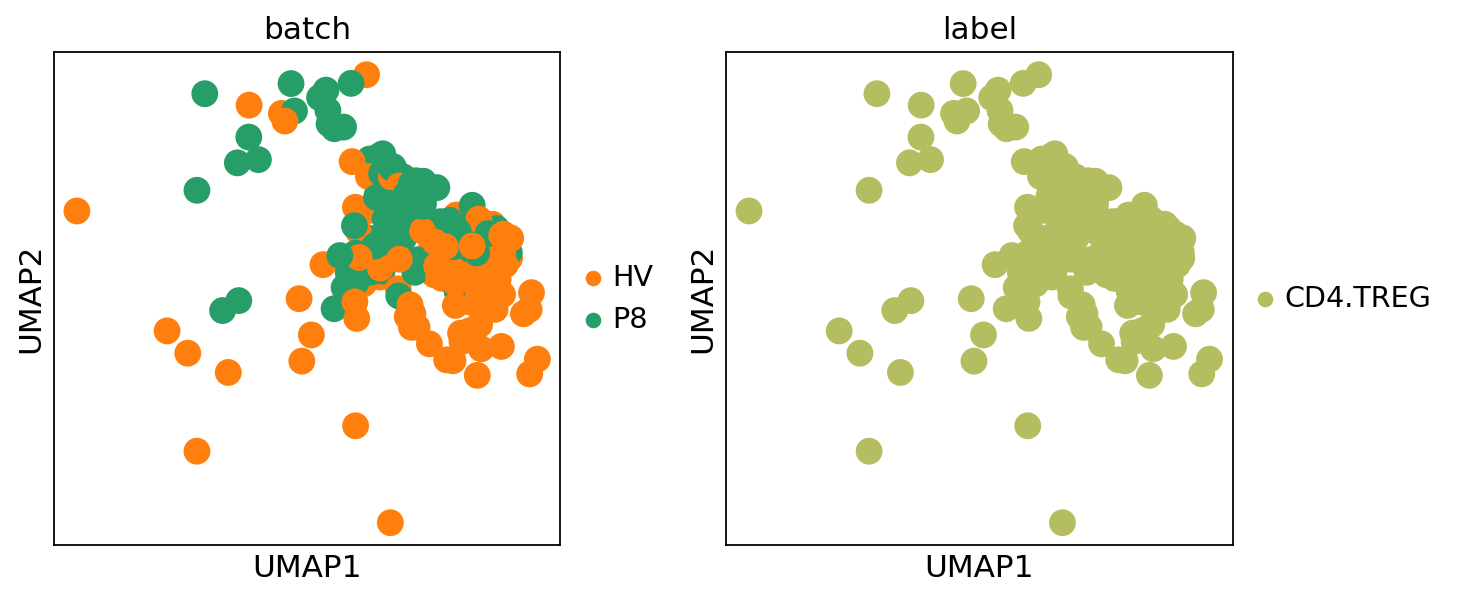

In [107]:
sc.pl.umap(adata[adata.obs['label']=='CD4.TREG'], color=['batch', 'label'], ncols=2)

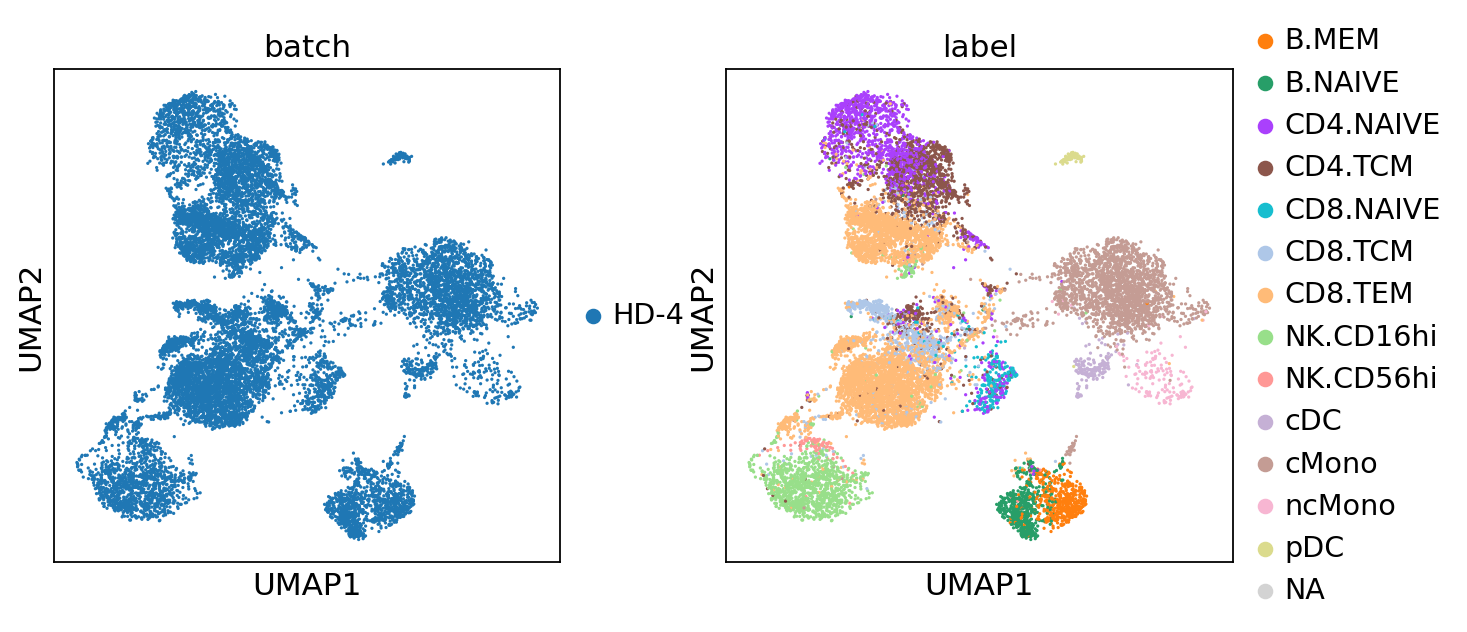

In [110]:
sc.pl.umap(adata[adata.obs['batch']=='HD-4'], color=['batch', 'label'], ncols=2)

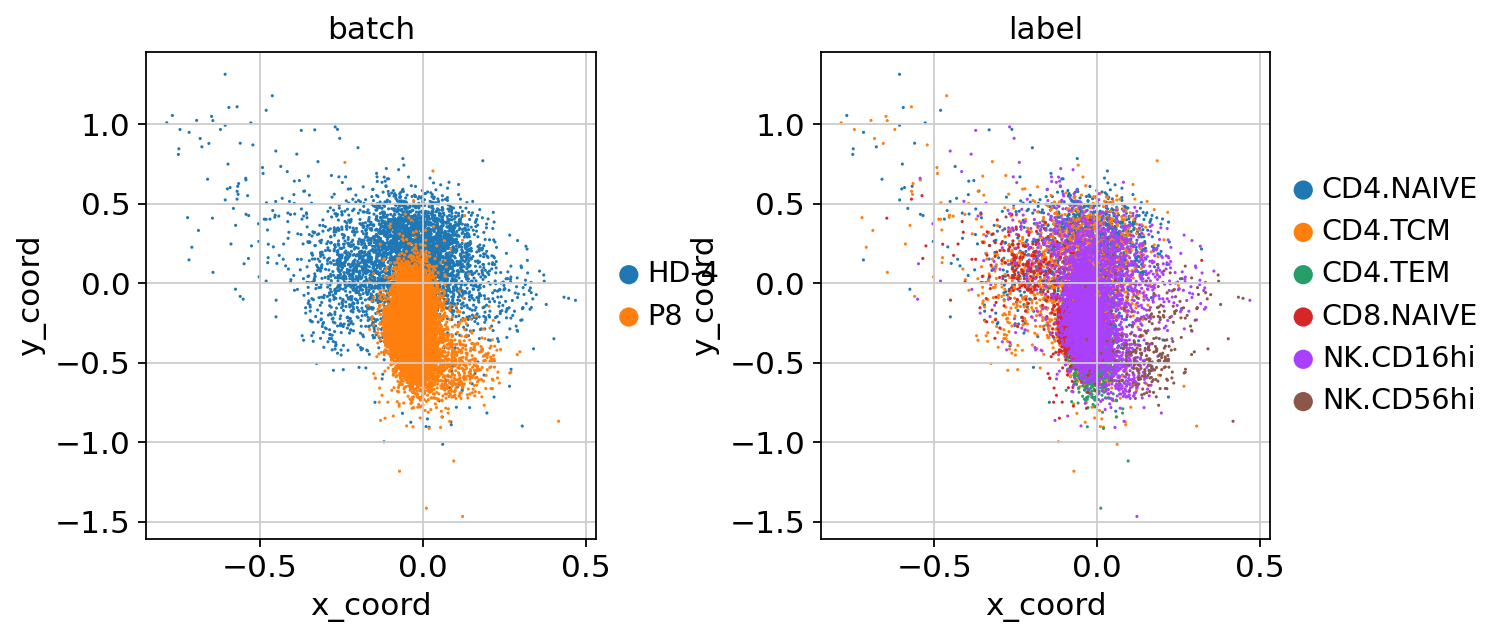

In [94]:
adata_bio.obs["x_coord"] = adata_bio.X[:, 0]  # 如果是稀疏矩阵
adata_bio.obs["y_coord"] = adata_bio.X[:, 1]  # 同上
sc.pl.scatter(adata_bio,x="x_coord",y="y_coord",color=['batch','label'])

In [76]:
# temp = joint_embeddings
temp['z']['joint']

array([[-0.09272277,  0.02074274,  0.12523238, ...,  0.15342969,
         0.49753356, -0.5075238 ],
       [-0.242099  ,  0.17211081,  0.09420258, ..., -0.0176278 ,
         0.49971947, -0.503788  ],
       [-0.68668437,  0.44753927,  0.2533016 , ..., -0.17197005,
         0.54401606, -0.19435242],
       ...,
       [ 0.1279911 , -0.16637693,  0.01096052, ...,  0.05773762,
        -0.48976707,  0.53028864],
       [-0.03567291, -0.43131912, -0.1500878 , ...,  0.23095419,
        -0.4803761 ,  0.596064  ],
       [ 0.031233  , -0.03336504, -0.04826544, ...,  0.2874744 ,
        -0.45163292,  0.56787634]], shape=(5307, 34), dtype=float32)

In [77]:
(temp['z']['joint']-joint_embeddings['z']['joint']).sum()

np.float32(1096.7828)

In [48]:
batch_corrected_counts = load_predicted(path, model.combs, batch_correct=True)
adata = sc.AnnData(np.zeros([len(batch_corrected_counts['x_bc']['rna']), 1]))
adata.obs['label'] = labels
adata.obs['batch'] = batch_ids
# f = ro.r('''DimPlot(obj, reduction='umap')''')
adata.obsm['batch_corrected']
adata.obsm['umap'] = pd.DataFrame(f[0]).iloc[:2].T.values
# shuffle
sc.pp.subsample(adata, fraction=1)
sc.pl.umap(adata, color=['batch', 'label'], ncols=1)

INFO:root:Loading predicted variables ...
INFO:root:Loading batch 0: z, joint
100%|██████████| 41/41 [00:00<00:00, 446.35it/s]
INFO:root:Loading batch 0: x_bc, rna
100%|██████████| 41/41 [00:03<00:00, 13.22it/s]
INFO:root:Loading batch 0: x_bc, adt
100%|██████████| 41/41 [00:00<00:00, 192.69it/s]
INFO:root:Loading batch 1: z, joint
100%|██████████| 55/55 [00:00<00:00, 411.91it/s]
INFO:root:Loading batch 1: x_bc, rna
100%|██████████| 55/55 [00:03<00:00, 13.85it/s]
INFO:root:Loading batch 1: x_bc, adt
100%|██████████| 55/55 [00:00<00:00, 473.26it/s]
INFO:root:Loading batch 2: z, joint
100%|██████████| 34/34 [00:00<00:00, 516.10it/s]
INFO:root:Loading batch 2: x_bc, rna
100%|██████████| 34/34 [00:02<00:00, 15.52it/s]
INFO:root:Loading batch 2: x_bc, adt
100%|██████████| 34/34 [00:00<00:00, 135.97it/s]
INFO:root:Converting to numpy ...
INFO:root:Converting batch 0: s, joint
INFO:root:Converting batch 0: z, joint
INFO:root:Converting batch 0: x_bc, rna
INFO:root:Converting batch 0: x_bc, ad

KeyError: 'batch_corrected'

In [52]:
batch_corrected_counts['x_bc']['adt']

array([[ 4.,  1.,  4., ...,  2.,  7.,  1.],
       [ 2.,  3.,  3., ...,  2., 13.,  3.],
       [ 4.,  0.,  2., ...,  4., 10.,  1.],
       ...,
       [ 1.,  2.,  1., ...,  1., 44.,  3.],
       [ 3.,  0.,  4., ...,  2., 42.,  7.],
       [ 7.,  2.,  4., ...,  7., 28.,  2.]],
      shape=(32961, 72), dtype=float32)

In [61]:

for i in range(1,4):
    adata = sc.read_h5ad('../data/result section 2/'+str(i)+'/data.h5ad')
    if i == 1:
        adata_adt = adata[:,adata.var['feature_types']=='Antibody Capture']
    else:
        adata_adt = sc.concat([adata_adt,adata[:,adata.var['feature_types']=='Antibody Capture']],axis=0) 

/home/xinzhu/anaconda3/envs/vae-tools/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xinzhu/anaconda3/envs/vae-tools/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/xinzhu/anaconda3/envs/vae-tools/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [59]:
adata_adt

AnnData object with n_obs × n_vars = 49113 × 72
    obs: 'cell_type', 'batch', 'subtype'

In [76]:
bc_adt = np.apply_along_axis(lambda x: np.log(x+1) - np.mean(np.log(x+1)),0,batch_corrected_counts['x_bc']['adt'])   
bc_adt = pd.DataFrame(index=adata_adt.obs_names,columns=adata_adt.var_names,data=bc_adt)

In [81]:
adata_bcadt = sc.AnnData(bc_adt)
adata_bcadt.obs = adata_adt.obs

In [111]:
import matplotlib.pyplot as plt

tree_label = pd.read_csv('../data/result section 2/midas/all123_hvg500/tree_label.csv',index_col=0)

subdata = bc_adt[tree_label.iloc[:,0]==-1]
plt.scatter(subdata['CD3'].values,subdata['CD19'].values)
subdata = bc_adt[tree_label.iloc[:,0]==1]
plt.scatter(subdata['CD3'].values,subdata['CD19'].values)

NameError: name 'bc_adt' is not defined

In [78]:
adata_adt

AnnData object with n_obs × n_vars = 32961 × 72
    obs: 'cell_type', 'batch', 'subtype'

In [100]:
adata_lda = sc.read_h5ad('../data/result section 2/rna_norm_lda.h5ad')

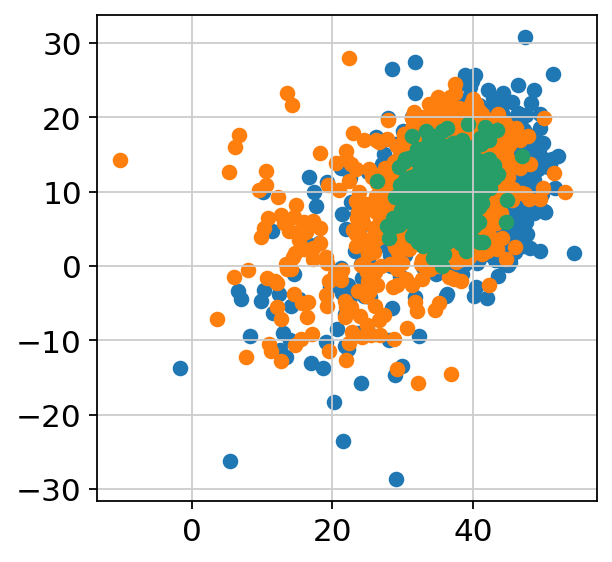

In [104]:
batches = ['HV','HD-4','P8']
cts = ['CD4.TCM','CD4.TREG']
# subdata = adata_bcadt[adata_bcadt.obs['subtype'].isin(cts)]
subdata = adata_lda[adata_lda.obs['subtype'].isin(cts)]
for i in range(3):
    batch = batches[i]
    subsubdata = subdata[subdata.obs['batch']==batch]
    # plt.scatter(subsubdata[:,'CD4'].X,subsubdata[:,'CD8'].X,alpha=0.5)
    plt.scatter(subsubdata.obsm['X_pca_lda'][:,-1],subsubdata.obsm['X_pca_lda'][:,-2])
